In [1]:
##importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##loading the csv files into dataframes
match_df = pd.read_csv("IPL Data/matches.csv")
dlvr_df = pd.read_csv("IPL Data/deliveries.csv")
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
138,139,2009,Durban,01-05-2009,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi,NaN
718,11314,2019,Chennai,09-04-2019,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,DL Chahar,M. A. Chidambaram Stadium,Rod Tucker,C Shamshuddin,Ulhas Gandhe
806,1216535,2020,Dubai (DSC),31-10-2020,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Ishan Kishan,Dubai International Cricket Stadium,Yeshwant Barde,Paul Reiffel,Anil Chaudhary
157,158,2009,Durban,13-05-2009,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Delhi Daredevils,12,0,R Bhatia,Kingsmead,DJ Harper,SL Shastri,NaN
538,539,2015,Delhi,23-04-2015,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,37,0,SS Iyer,Feroz Shah Kotla,SD Fry,CK Nandan,NaN
726,11322,2019,Mumbai,15-04-2019,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Nanda Kishore
483,484,2014,Mumbai,06-05-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,19,0,RG Sharma,Wankhede Stadium,S Ravi,K Srinath,NaN
362,363,2012,Kolkata,12-05-2012,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,27,0,RG Sharma,Eden Gardens,S Ravi,SJA Taufel,NaN
629,630,2016,Kanpur,21-05-2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
178,179,2010,Chennai,14-03-2010,Deccan Chargers,Chennai Super Kings,Deccan Chargers,bat,normal,0,Deccan Chargers,31,0,WPUJC Vaas,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN


In [3]:
match_df['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [4]:
match_df['team1'].value_counts()

Mumbai Indians                 108
Kings XI Punjab                 98
Chennai Super Kings             96
Royal Challengers Bangalore     93
Kolkata Knight Riders           90
Rajasthan Royals                74
Delhi Daredevils                72
Sunrisers Hyderabad             70
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  16
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [5]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [6]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)

In [7]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [8]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    int64 
 2   city             809 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    int64 
 5   team2            816 non-null    int64 
 6   toss_winner      816 non-null    int64 
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           816 non-null    int64 
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  812 non-null    object
 14  venue            816 non-null    object
 15  umpire1          814 non-null    object
 16  umpire2          814 non-null    object
 17  umpire3          179 non-null    ob

In [10]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,2,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,3,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,4,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,5,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [11]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 120
Chennai Super Kings -> 106
Kolkata Knight Riders -> 99
Royal Challengers Bangalore -> 91
Kings XI Punjab -> 88
Rajasthan Royals -> 81
Delhi Daredevils -> 67
Sunrisers Hyderabad -> 66
Deccan Chargers -> 29
Pune Warriors -> 19
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Rising Pune Supergiant -> 6
Delhi Capitals -> 4


<AxesSubplot:>

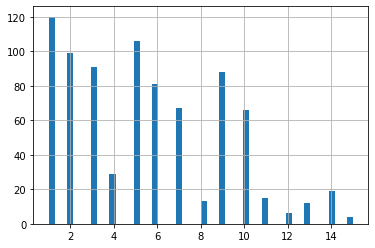

In [12]:
match_df['winner'].hist(bins=50)

In [13]:
match_df['winner'].value_counts()

1     120
5     106
2      99
3      91
9      88
6      81
7      67
10     66
4      29
14     19
11     15
8      13
13     12
12      6
15      4
Name: winner, dtype: int64

{'Mumbai Indians': 1,
 'Kolkata Knight Riders': 2,
 'Royal Challengers Bangalore': 3,
 'Deccan Chargers': 4,
 'Chennai Super Kings': 5,
 'Rajasthan Royals': 6,
 'Delhi Daredevils': 7,
 'Gujarat Lions': 8,
 'Kings XI Punjab': 9,
 'Sunrisers Hyderabad': 10,
 'Rising Pune Supergiants': 11,
 'Rising Pune Supergiant': 11,
 'Kochi Tuskers Kerala': 12,
 'Pune Warriors': 13,
 'Delhi Capitals': 14,
 'Draw': 15}

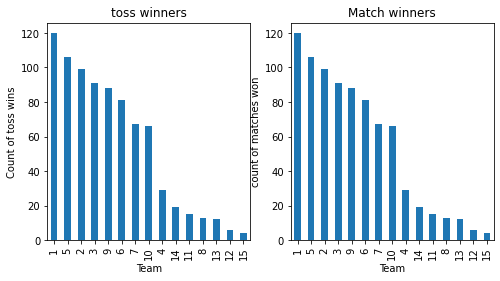

In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

team_encodings